# Number of Crashes Per Neighborhood

## by Brian Fang

Crash Data Dataset: [2021 Crash Data](https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/e3b145c0-41ba-4cc9-9054-8f686ac59643)

Neighborhoods Dataset: [Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

In [3]:
import geopandas as gpd
import pandas as pd

# Load in the neighborhood data
neighborhoods_data = gpd.read_file('Neighborhoods_.shp')

neighborhoods_data.head(5)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We will utilize the geometry column and neighborhood name column to relate the latitude and longitude provided in the crash data dataset to the actual neighborhoods. Thus, we will be able to add the collision data to the proper neighborhood.

In the cell below, we will load in the crash data

In [4]:
# Load in the crash counts
counts = gpd.read_file('crash-data.csv')

counts.head(5)

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT,geometry
0,2021000002,11,02,02113,02113,2021,01,6,0028,00,...,N,2,0130,35,0142,490,BEULAH RD,4,,None
1,2021000007,11,02,02113,02113,2021,01,6,0100,01,...,U,4,,,,,LAKETON RD,0,,None
2,2021000017,11,02,02301,02301,2021,01,6,0140,01,...,N,4,,25,,,SARANAC AV,0,,None
3,2021000020,11,02,02113,02113,2021,01,6,0303,03,...,E,4,,25,,,UNIVERSAL RD,0,,None
4,2021000026,11,02,02304,02304,2021,01,6,0120,01,...,S,4,,25,,,COURSIN ST,1,,None


In the cell below, we will create a new dataframe with only the necessary information.

In [5]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Number_Of_Crashes"])
neighborhoods["Neighborhood"] = neighborhoods_data["hood"]
neighborhoods["Geometry"] = neighborhoods_data["geometry"]
neighborhoods["Number_Of_Crashes"] = 0

neighborhoods.head(5)

,Neighborhood,Geometry,Number_Of_Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",0
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",0


In the cell below, we will iterate through all rows of the crash data dataset and add to the "Number_Of_Crashes" column in our dataframe accordingly for each neighborhood.

In [6]:
from shapely.geometry import Point

for i, count in counts.iterrows():
    # Create a point out of the latitude and longitude
    try:
        latitude = float(count["DEC_LAT"])
        longitude = float(count["DEC_LONG"])
        pt = Point(longitude, latitude)
        for j, neighborhood in neighborhoods.iterrows():
            # Add the count to the proper neighborhood
            if neighborhood["Geometry"].contains(pt):
                neighborhoods.at[j, 'Number_Of_Crashes'] = neighborhood['Number_Of_Crashes'] + 1
                # Break to save time once found
                break
    except:
        next
            
neighborhoods.head(5)

,Neighborhood,Geometry,Number_Of_Crashes
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",41
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",73
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",21
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",15
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",33


In the cell below, we will sort the data in ascending order to see the neighborhoods with the fewest crashes (which will be considered better for our metric).

In [8]:
# Mask data so only the neighborhoods with data are portrayed
query_mask = neighborhoods['Number_Of_Crashes'] > 0
neighborhoods_masked = neighborhoods[query_mask]
# Sort in ascending order to see the neighborhoods with the least collisions
neighborhoods_sorted = neighborhoods_masked.sort_values("Number_Of_Crashes", ascending = True)

neighborhoods_sorted.head(10)

,Neighborhood,Geometry,Number_Of_Crashes
67,Mt. Oliver,"POLYGON ((-79.97842 40.40626, -79.97848 40.406...",3
37,New Homestead,"POLYGON ((-79.91621 40.39849, -79.91621 40.398...",3
50,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",3
10,Glen Hazel,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",4
28,East Carnegie,"POLYGON ((-80.07255 40.42533, -80.07245 40.424...",4
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",4
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",8
73,St. Clair,"POLYGON ((-79.96995 40.41188, -79.96932 40.411...",8
68,California-Kirkbride,"POLYGON ((-80.01642 40.45928, -80.01640 40.459...",9
85,Regent Square,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",9


From this table, we can see that three neighborhoods (Mt. Oliver, New Homestead, and Chartiers City) are all tied for the least number of crashes at 3. In the cell below, I will plot the 25 neighborhoods with the least collisions.

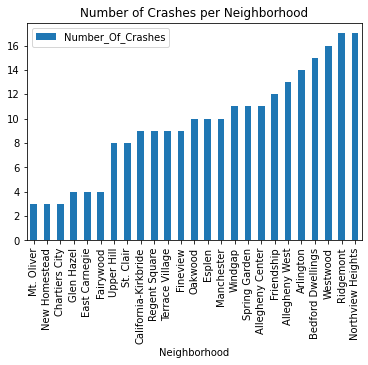

In [9]:
plt = neighborhoods_sorted.iloc[:25].plot(kind='bar', x="Neighborhood", y="Number_Of_Crashes", title="Number of Crashes per Neighborhood")

Now, I will also list and plot the 25 neighborhoods with the most collisions to give another perspective.

In [10]:
neighborhoods_descending = neighborhoods_masked.sort_values("Number_Of_Crashes", ascending = False)

neighborhoods_descending.head(10)

,Neighborhood,Geometry,Number_Of_Crashes
43,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",230
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",223
88,South Side Flats,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",180
27,Greenfield,"POLYGON ((-79.92673 40.41886, -79.92692 40.418...",159
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",134
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",134
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",131
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",116
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",95
29,North Shore,"POLYGON ((-79.99529 40.44985, -79.99535 40.449...",90


The Central Business District has the most, which makes sense because that is downtown Pittsburgh.

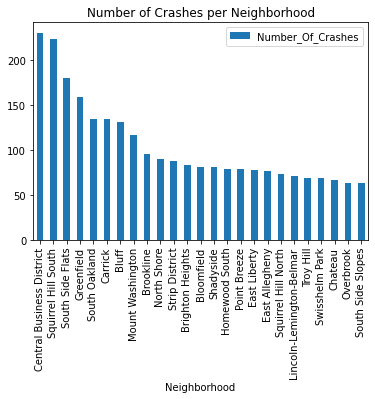

In [11]:
plt2 = neighborhoods_descending.iloc[:25].plot(kind='bar', x="Neighborhood", y="Number_Of_Crashes", title="Number of Crashes per Neighborhood")

In the cell below, I will finish by uploading the crash counts to the geodataframe to provide a visual representation.

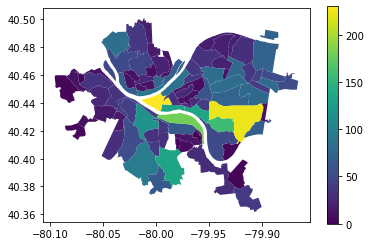

In [12]:
neighborhoods_data["VEHICLE_COUNT"] = neighborhoods["Number_Of_Crashes"]

neighborhoods_data.plot(column="VEHICLE_COUNT", legend=True)

This is the end of the analysis for the number of collisions per neighborhood. On the diargram above, the darker purple regions are "better" because they signify much less collisions than the brighter green and yellow areas.